#  Climate Change Tweets Sentiment Analysis
## Patrik Karlovic
## DSC 550

### Intro

With the most recent report released by the Intergovernmental Panel on Climate Change (IPCC), there has been cause for alarm within the scientific community on various publications linking extreme events such as heatwaves and extreme rainfall to anthropogenic climate change. The report essentially linked the atmospheric greenhouse gas increase from 1750 to human activity over the same period, which has led to an average global temperature increase over the last decade to be higher than those in previous geological periods. Climate Change is currently a hot topic in the Pacific Northwest where I live, we just experienced the hottest temperatures to data as well as frequently experience wildfires and smoke every year. These wildfires have estroyed habitats/homes for people and animals and have led to an increase in particulates in the air which have the ability to effect those with lung conditions. Due to these events, new wildfire policies have been introduced to combat increased fuels in forests in the Pacific Northwest. Is there a way to retrieve public sentiment on a topic related to Climate Change and to focus policy on topics which carry a high weight in the public perception?

### Business Problem

The purpose of my project will be to understand the sentiment on Climate change through Natural Language Processing. I want to uncover some of the most mentioned/associated words and issues within the topic of Climate Change as well as the sentiment that is associated with those words. The purpose of finding words associated with Climate Change with very high or very low sentiment will allow for a look into topics associated with climate change which can guide policy making decisions. My hypothesis is, as long as a word is associated with climate change and is a known policy topic (such as wildfire) , it will recieve a lot of mentions in social media. Regardless of sentiment, the amount of times a word is mentioned will determine its importance in public perception. 

### The Code and Process

In [1]:
#Import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import csv
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
plt.style.use('fivethirtyeight')

In [2]:
#Getting Data from twitter
#Keys
consumer_key= 'Insert Consumer Key'
consumer_secret= 'Insert Consumer Secret'
access_token= 'Insert Access Token'
access_token_secret= 'Insert Access Token Secret'

#Creating an authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

#Setting the access and secret access token
authenticate.set_access_token(access_token, access_token_secret)

#Creating an API object with authentication info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [3]:
#Retrieving Tweets from Twitter

#file = open('climatechange.csv', 'w',encoding='utf-8')
#csvWriter = csv.writer(file)
#for tweet in tweepy.Cursor(api.search,q="#climatechange",lang="en", count = 20000, since="2020-01-01").items():
    #csvWriter.writerow([tweet.created_at, tweet.text])
#file.close()

#Tweets already retrieved for the purpose of this case study

In [4]:
#Reading our data:
climatechangedata = pd.read_csv("climatechange.csv", header = None,
                   encoding='utf-8', names = ['Time', 'Tweets'])

In [5]:
#Tweet Pre-Processing


#removing hashtags related to Climate Change
def rem_hashtags(text):
    processed_text = re.sub(r"#climatechange", "", text)
    processed_text = " ".join(processed_text.split())
    return processed_text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x:rem_hashtags(x))#removing tagged users from the tweets
#Removing users
def remove_users(text):
    processed_text = re.sub(r'@\w+ ?',"",text)
    processed_text = " ".join(processed_text.split())
    return processed_text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x:remove_users(x))#removing hyperlinks mentioned in the tweets
#Removing Links
def remove_links(text):
    processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    processed_text = " ".join(processed_text.split())
    return processed_text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x:remove_links(x))#removing punctuations in the tweets
#Removing Punctuation
def remove_punct(text):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text  = "".join([char for char in text if char not in punctuations])
    text = re.sub('[0-9]+', '', text)
    return text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: remove_punct(x))#making all tweets lowercase
#Creating all Lowercase
def lowercase_word(text):
    text  = "".join([char.lower() for char in text])
    return text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: lowercase_word(x))


In [6]:
#Removing Stopwords and Collection words. 

stop_words = stopwords.words('english')
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

collectionwords = ['climatechange', 'climate', 'change', 'rt']
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (collectionwords)]))

In [7]:
data = climatechangedata
data.head(10)

,Time,Tweets
0,2021-08-14 21:56:40,new heres best cartoons found covering weeks n...
1,2021-08-14 21:56:23,go vegan it’s late
2,2021-08-14 21:56:21,power make real refuse anything im talking and…
3,2021-08-14 21:56:16,small sample survey sizes never told commissio...
4,2021-08-14 21:55:26,hyundai rolling “roboshuttle” tesla ev renewab...
5,2021-08-14 21:55:12,go vegan it’s late
6,2021-08-14 21:55:03,nicholasstern uk can’t fight crisis austerity ...
7,2021-08-14 21:54:44,solve answer question thoughtful way inspire a...
8,2021-08-14 21:54:41,major step forward fossil carbon dioxide reduc...
9,2021-08-14 21:53:25,humaninduced global warming rise interactive t...


In [8]:
#Creating a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
data['Subjectivity']= data['Tweets'].apply(getSubjectivity)
data['Polarity']=data['Tweets'].apply(getPolarity)

#Shows new dataframe with the new columns
data

,Time,Tweets,Subjectivity,Polarity
0,2021-08-14 21:56:40,new heres best cartoons found covering weeks n...,0.377273,0.568182
1,2021-08-14 21:56:23,go vegan it’s late,0.600000,-0.300000
2,2021-08-14 21:56:21,power make real refuse anything im talking and…,0.300000,0.200000
3,2021-08-14 21:56:16,small sample survey sizes never told commissio...,0.512500,-0.125000
4,2021-08-14 21:55:26,hyundai rolling “roboshuttle” tesla ev renewab...,0.000000,0.000000
...,...,...,...,...
129877,2021-08-06 19:45:29,loading cranes katrina portraits grey cross st...,0.050000,-0.025000
129878,2021-08-06 19:45:24,beautiful katrina portraits grey cross studios...,0.366667,0.266667
129879,2021-08-06 19:45:21,ipcc report expected show temperatures rising ...,0.400000,-0.100000
129880,2021-08-06 19:45:00,earth overshoot day terrifying milestone earth...,1.000000,-1.000000


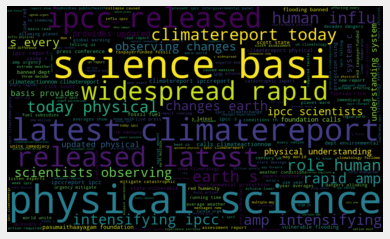

In [9]:
#Plotting a word cloud
allWords = ' '.join([twts for twts in data['Tweets']])
wordCloud = WordCloud(width=1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


The first graphics which I decided to make were word clouds on what words are mentioned most in twitter when alligned with the #climatechange. Here we are able to see that some important words for the entire dataset are Climate Report, Science, IPCC, Physical, Widespread, Intensifying, Change. 

In [10]:
#Computing negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)

data

,Time,Tweets,Subjectivity,Polarity,Analysis
0,2021-08-14 21:56:40,new heres best cartoons found covering weeks n...,0.377273,0.568182,Positive
1,2021-08-14 21:56:23,go vegan it’s late,0.600000,-0.300000,Negative
2,2021-08-14 21:56:21,power make real refuse anything im talking and…,0.300000,0.200000,Positive
3,2021-08-14 21:56:16,small sample survey sizes never told commissio...,0.512500,-0.125000,Negative
4,2021-08-14 21:55:26,hyundai rolling “roboshuttle” tesla ev renewab...,0.000000,0.000000,Neutral
...,...,...,...,...,...
129877,2021-08-06 19:45:29,loading cranes katrina portraits grey cross st...,0.050000,-0.025000,Negative
129878,2021-08-06 19:45:24,beautiful katrina portraits grey cross studios...,0.366667,0.266667,Positive
129879,2021-08-06 19:45:21,ipcc report expected show temperatures rising ...,0.400000,-0.100000,Negative
129880,2021-08-06 19:45:00,earth overshoot day terrifying milestone earth...,1.000000,-1.000000,Negative


Our next step is to compute wether Datasets are positive sentiment, negative sentiment, or neutral sentiment. Here we will split our data into positive and negative tweets. This way we will be able to perform an analysis on each kind of sentiment. 

In [11]:
#Negative tweet dataframe
Neg_tweets = data[(data['Analysis']=='Negative')]
#Positive tweet dataframe 
Pos_tweets = data[(data['Analysis']=='Positive')]

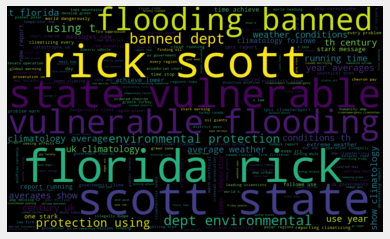

In [12]:
#Plotting negative word clouds
NegWords = ' '.join([twts for twts in Neg_tweets['Tweets']])
NegCloud = WordCloud(width=1000, height = 600, random_state = 21, max_font_size = 119).generate(NegWords)

plt.imshow(NegCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

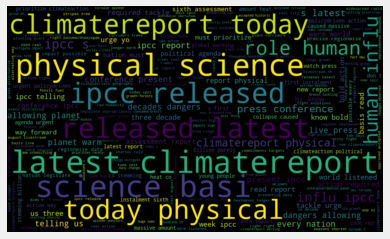

In [13]:
#Plotting Positive word clouds
PosWords = ' '.join([twts for twts in Pos_tweets['Tweets']])
PosCloud = WordCloud(width=1000, height = 600, random_state = 21, max_font_size = 119).generate(PosWords)

plt.imshow(PosCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Plotting polarity and subjectivity
plt.figure(figsize=(15,15))
for i in range(0, data.shape[0]):
    plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Here we are able to see the distribution of tweets and their polarities and subjectivity. We can see that tweets about Climate Change tend to be more Subjective as opposed to their Polarity.

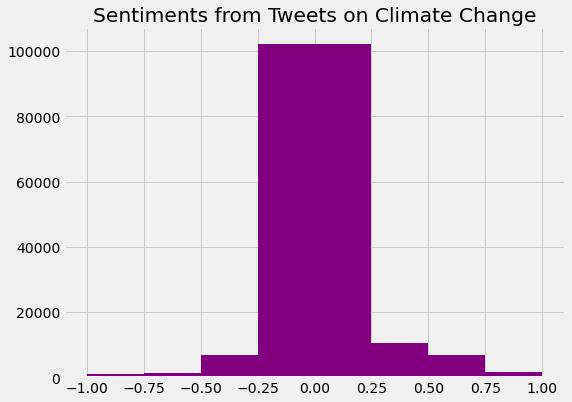

In [14]:
polaritydf = data.Polarity

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
polaritydf.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [15]:
#Percentage of positive tweets
ptweets = data[data.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(  (ptweets.shape[0]/data.shape[0])*100, 1)

36.5

In [16]:
#Percentage of negative tweets
ntweets = data[data.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(  (ntweets.shape[0]/data.shape[0])*100, 1)

16.6

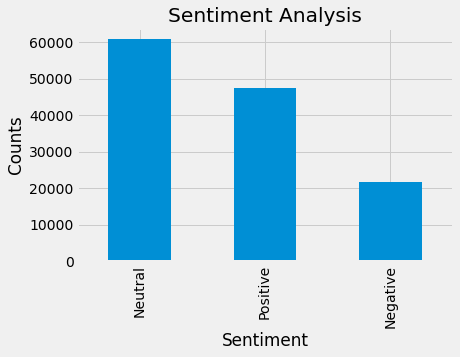

In [17]:
#Showing counts
data['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

data['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Performing Further Feature Extraction:

To add on to the analyis, it is important to gain some more feature extractions from our tweets. For this one of the issues which we need to solve are word count. For this purpose we will create a word count vectorizer which will allow me to extract even more features in our dataset. 

In [18]:
#Attempting Text Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer
text= data['Tweets']

vectorizer = TfidfVectorizer()
# tokenize and build vocab
vector=vectorizer.fit_transform(text)
print('{} Number of Tweets has {} words' .format(vector.shape[0],vector.shape[1]))

129882 Number of Tweets has 29502 words


In [19]:
vect_df = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
vect_df.head()

,aa,aaand,aad,aadvmx,aaic,aao,aaron,aatmanirbharta,ab,aba,...,𝙏𝙝𝙚,𝙔𝙤𝙪,𝙲𝚕𝚒𝚖𝚊𝚝𝚎,𝙸𝚗𝚝𝚛𝚘,𝚝𝚘,𝟏𝟑,𝟐𝟎𝟑,𝟐𝟕𝐭𝐡,𝟓𝟎,𝟰𝟴𝟴
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Most Used Words in the Entire DF
count = pd.DataFrame(vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:20]

,0
ipcc,5206.769804
science,4200.421021
basis,4064.391777
climatereport,3758.712495
amp,3129.111908
latest,3060.654198
today,2709.674879
released,2641.758451
every,2551.713255
earth,2472.909274


In [21]:
data = data
#Attempting Text Feature Extraction again

from sklearn.feature_extraction.text import TfidfVectorizer
text= data['Tweets']

vectorizer = TfidfVectorizer()
# tokenize and build vocab
vector=vectorizer.fit_transform(text)
print('{} Number of Tweets has {} words' .format(vector.shape[0],vector.shape[1]))

129882 Number of Tweets has 29502 words


In [25]:
vect_df.head()

,aa,aaand,aad,aadvmx,aaic,aao,aaron,aatmanirbharta,ab,aba,...,𝙏𝙝𝙚,𝙔𝙤𝙪,𝙲𝚕𝚒𝚖𝚊𝚝𝚎,𝙸𝚗𝚝𝚛𝚘,𝚝𝚘,𝟏𝟑,𝟐𝟎𝟑,𝟐𝟕𝐭𝐡,𝟓𝟎,𝟰𝟴𝟴
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



##

### Testing TextBlob againt VaderSentiment

 We already did use the TextBlob model which is a python library which utilizes an already existing API to analyze sentiment in text. For the purpose of testing our first model on sentiment we will be testing another type of tool known as VADER sentiment analysis. Vader sentiment is useful for analyzing social media text/emojis since it has built in slang. The great point of using VADER is that it does not require training data as it is constructed from a generalizable, valence-based, human curated gold standard sentiment lexicon. 

In [26]:
#Importing and initiating our vader sentiment. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [27]:
#Performing the same preprocessing of our data as before:
#removing hashtags related to globalwarming
def rem_hashtags(text):
    processed_text = re.sub(r"#climatechange", "", text)
    processed_text = " ".join(processed_text.split())
    return processed_text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x:rem_hashtags(x))#removing tagged users from the tweets
def remove_users(text):
    processed_text = re.sub(r'@\w+ ?',"",text)
    processed_text = " ".join(processed_text.split())
    return processed_text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x:remove_users(x))#removing hyperlinks mentioned in the tweets
def remove_links(text):
    processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    processed_text = " ".join(processed_text.split())
    return processed_text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x:remove_links(x))#removing punctuations in the tweets
def remove_punct(text):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text  = "".join([char for char in text if char not in punctuations])
    text = re.sub('[0-9]+', '', text)
    return text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: remove_punct(x))#making all tweets lowercase
def lowercase_word(text):
    text  = "".join([char.lower() for char in text])
    return text
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: lowercase_word(x))

In [28]:
stop_words = stopwords.words('english')
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

collectionwords = ['climatechange', 'climate', 'change','rt']
climatechangedata['Tweets'] = climatechangedata['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (collectionwords)]))

In [29]:
Vdata = climatechangedata

In [30]:
#Creating a new dataframe for the vader model. 
Vdata['scores'] = Vdata['Tweets'].apply(lambda Description: analyser.polarity_scores(Description))
Vdata.head()

,Time,Tweets,Subjectivity,Polarity,Analysis,scores
0,2021-08-14 21:56:40,new heres best cartoons found covering weeks n...,0.377273,0.568182,Positive,"{'neg': 0.126, 'neu': 0.632, 'pos': 0.241, 'co..."
1,2021-08-14 21:56:23,go vegan it’s late,0.600000,-0.300000,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2021-08-14 21:56:21,power make real refuse anything im talking and…,0.300000,0.200000,Positive,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp..."
3,2021-08-14 21:56:16,small sample survey sizes never told commissio...,0.512500,-0.125000,Negative,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
4,2021-08-14 21:55:26,hyundai rolling “roboshuttle” tesla ev renewab...,0.000000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [31]:
#Seperating tweets into positive, negative, and neutral tweets. 
Vdata['compound'] = Vdata['scores'].apply(lambda score_dict: score_dict['compound'])
Vdata['sentiment_type']=''
Vdata.loc[Vdata.compound>0,'sentiment_type']='POSITIVE'
Vdata.loc[Vdata.compound==0,'sentiment_type']='NEUTRAL'
Vdata.loc[Vdata.compound<0,'sentiment_type']='NEGATIVE'
Vdata.head()

,Time,Tweets,Subjectivity,Polarity,Analysis,scores,compound,sentiment_type
0,2021-08-14 21:56:40,new heres best cartoons found covering weeks n...,0.377273,0.568182,Positive,"{'neg': 0.126, 'neu': 0.632, 'pos': 0.241, 'co...",0.4588,POSITIVE
1,2021-08-14 21:56:23,go vegan it’s late,0.600000,-0.300000,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,2021-08-14 21:56:21,power make real refuse anything im talking and…,0.300000,0.200000,Positive,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...",-0.2960,NEGATIVE
3,2021-08-14 21:56:16,small sample survey sizes never told commissio...,0.512500,-0.125000,Negative,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.3612,POSITIVE
4,2021-08-14 21:55:26,hyundai rolling “roboshuttle” tesla ev renewab...,0.000000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


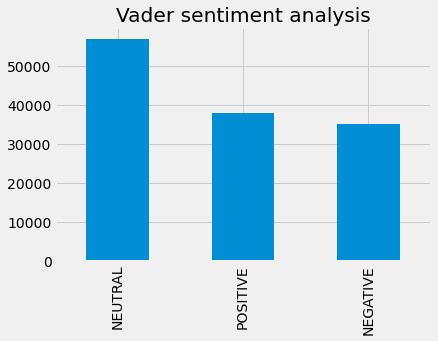

In [50]:
#Graphing the counts of each kind of tweet. 
Vdata.sentiment_type.value_counts().plot(kind='bar',title="Vader sentiment analysis")

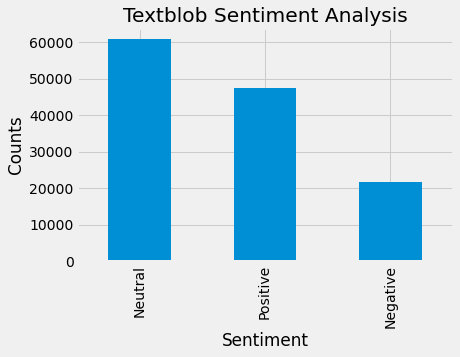

In [51]:
#Showing counts
data['Analysis'].value_counts()

plt.title('Textblob Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

data['Analysis'].value_counts().plot(kind='bar')
plt.show()

The Vader model classifies less data as Neutral and Positive and shifts some of those tweets to negative sentiment. The Vader model seems to normalize that data a little better compared to text blob. 

KeyboardInterrupt: 

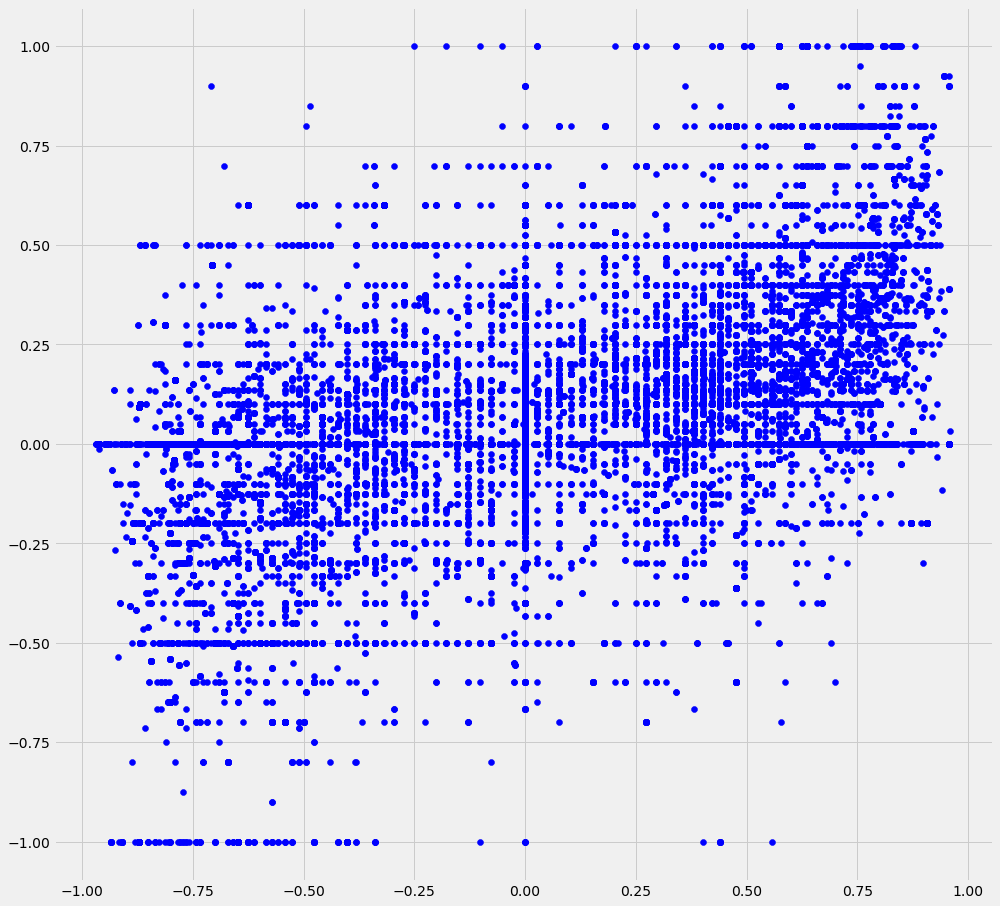

In [52]:
#Plotting the scores of each model against eachother. 
plt.figure(figsize=(15,15))
for i in range(0, Vdata.shape[0]):
    plt.scatter(Vdata['compound'][i],Vdata['Polarity'][i],color='Blue')
    
plt.title('VADER vs TextBlob')
plt.xlabel('Compound')
plt.ylabel('Polarity')
plt.show()

Looking at the comparison of VADER and TextBlob we are now seeing that Vader classification will more likely classify a text in the data as either a positive or negative as opposed to neutral which means that the VADER model is much more decisive. 

### Performing Word Count on our Final Dataset

So far in our Project we have extracted Climate Change Related Tweets, applied two sentiment analysis models to our data and created a Tfid Vector with out tweets. In order to further expand on our project, I want to be able to extract what topics are most tweeted about and the sentiment with those topics. This is so, that in a policy making position, we are able to determine what topics are more important to our consituents and how they feel about it. Topics that garner more attention (are mentioned more) will probably be more important to a general populace. Sentiment in this case can allow us to guage the public opinion on a topic. Before we continue, I want to update my code by using the VADER model for sentiment analysis. 

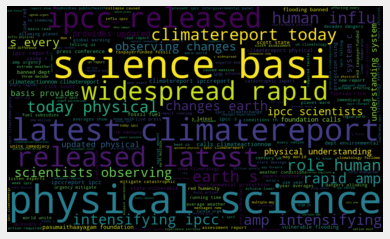

In [35]:
#Plotting a word cloud for the entire data
allWords = ' '.join([twts for twts in Vdata['Tweets']])
wordCloud = WordCloud(width=1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [36]:
#Negative tweet dataframe
Neg_tweets = Vdata[(Vdata['sentiment_type']=='NEGATIVE')]
#Positive tweet dataframe 
Pos_tweets = Vdata[(Vdata['sentiment_type']=='POSITIVE')]

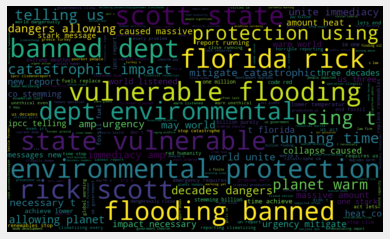

In [37]:
#Plotting negative word clouds
NegWords = ' '.join([twts for twts in Neg_tweets['Tweets']])
NegCloud = WordCloud(width=1000, height = 600, random_state = 21, max_font_size = 119).generate(NegWords)

plt.imshow(NegCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

The negative sentiment that stands out is environemntal departments  and environmental protection policies which indicate negative sentiment with implemented policies. There is negative sentiment with Florida's Senator Rick Scott and Florida in generalwith regards to the reaction and implemnetation of his environemtnal strategy. There is also a lot of negative sentiment with climate type activities such as flooding and heat. This is most likely due to recent flooding and heat waves in the United States and Globally especially since July has been the hottest month on record globally. 

In [38]:
#Negative Tweet Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
text= Neg_tweets['Tweets']
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vector=vectorizer.fit_transform(text)
print('{} Number of Tweets has {} words' .format(vector.shape[0],vector.shape[1]))

35076 Number of Tweets has 13366 words


In [39]:
vect_df = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
vect_df.head()

,aaand,aaic,ab,abandon,abandoned,abate,abbot,abc,abcfail,abcs,...,𝐭𝐨,𝐮𝐫𝐠𝐞𝐧𝐭,𝑶𝑼𝑹,𝑹𝑬𝑮𝑰𝑶𝑵,𝒟𝒾𝑒𝒷,𝒟𝒾𝑒𝒷𝒪,𝗵𝗼𝘂𝗿,𝗼𝗻𝗲,𝟏𝟑,𝟰𝟴𝟴
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Most Used Words
count = pd.DataFrame(vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:20]

,0
report,723.386883
flooding,662.852505
environmental,659.850928
vulnerable,657.985577
state,655.291827
amp,649.289351
scott,644.283566
us,641.309757
using,640.559173
banned,635.447766


Looking at our count vectorizer of tweets with negative sentiment, we see that some of the more negative words which may indicate some significant use is words such as flooding, environmental, Senator Rick Scott, Florida, Protection and IPCC. 

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(Neg_tweets['Tweets'])
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                    TF-IDF
talking           0.429281
anything          0.400401
refuse            0.388709
power             0.356345
im                0.320329
and               0.311182
make              0.299910
real              0.296529
poachers          0.000000
plus              0.000000
plymouthincident  0.000000
pm                0.000000
pmimrankhan       0.000000
pms               0.000000
pnw               0.000000
po                0.000000
pointed           0.000000
poaching          0.000000
point             0.000000
plunging          0.000000
pocketing         0.000000
pockets           0.000000
pod               0.000000
podcast           0.000000
poem              0.000000


Analyzing our TFIDF table, we are not really seeing any real results, only standard words appear. 

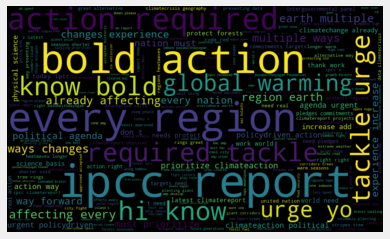

In [43]:
#Plotting Positive word clouds
PosWords = ' '.join([twts for twts in Pos_tweets['Tweets']])
PosCloud = WordCloud(width=1000, height = 600, random_state = 21, max_font_size = 119).generate(PosWords)

plt.imshow(PosCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Positive sentiment related to Climate Change rely on words which indicate change and action regarding Climate change. This indicates that there is positive sentiment on the creation and or want to create climate policy which can reduce the effects of climate change. 

In [44]:
#Positive Tweet Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
text= Pos_tweets['Tweets']
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vector=vectorizer.fit_transform(text)
print('{} Number of Tweets has {} words' .format(vector.shape[0],vector.shape[1]))

37800 Number of Tweets has 16859 words


In [45]:
vect_df = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
vect_df.head()

,aa,aatmanirbharta,ab,aba,aback,abadía,aband,abandon,abazari,abbas,...,𝘽𝙪𝙞𝙡𝙙𝙞𝙣𝙜,𝙂𝙧𝙚𝙚𝙣,𝙇𝙤𝙫𝙚,𝙈𝙚,𝙋𝙡𝙖𝙣𝙚𝙩,𝙏𝙝𝙚,𝙔𝙤𝙪,𝙲𝚕𝚒𝚖𝚊𝚝𝚎,𝙸𝚗𝚝𝚛𝚘,𝚝𝚘
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Most Used Words
count = pd.DataFrame(vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:20]

,0
action,595.708108
amp,548.972671
ipcc,535.840317
climatereport,463.810171
need,442.897018
every,414.826627
world,407.903521
know,407.539028
today,406.247416
tackle,383.367297


A lot of these words on the positive tweet count vectorizer indicate that action for climate change yield positive sentiment. There is a lot of positive sentiment regarding the IPCC climate report as well as want for action on climate change. 

In [47]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(Pos_tweets['Tweets'])
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                  TF-IDF
cuomos          0.368088
resignation     0.364290
cartoons        0.346944
covering        0.323005
weeks           0.274392
including       0.271466
infrastructure  0.266812
heres           0.252694
found           0.244738
week            0.226531
news            0.212445
best            0.197016
new             0.167071
plantbase       0.000000
plantbased      0.000000
plantsforbirds  0.000000
plantbreeding   0.000000
planted         0.000000
planti          0.000000
planting        0.000000
plantpakistan   0.000000
plants          0.000000
plastic         0.000000
plantshealth    0.000000
planttrees      0.000000


There is not a lot of help regarding our TFIDF Vectorizer in terms of recognizing important terms for positive sentiment tweets. What is funny is how Cuomos Resignation relates to positive tweets with a high TF-IDF score. What makes sense is that the word Infrastructure has a high TF-IDF value. Infrastructure's value means that it could indicate a lot of importance when looking at furthering a model, as the word is good indicator to positive sentiment regarding new infrastructure plans which are trending recently. 

### Issues and Potential Improvements

Given the models that were created using TextBlob and Vader, there were a few problems which occured during the analysis. The first, and probably most impactful model depends on how our NLP tools work. Currently, the model does not distinguish between a negative tweet regarding the validity of Climate Change or just a negative tweet in regards to issues related to Climate Change. This means we cannot differentiate between a user who believes in climate change or does not, we only recieve a negative sentiment from their tweet. In order to fix for this, it may be important to train a model specifically on tweets which regard this scenario. The Analysis uses 2 pre-built models which are already trained. Switching to subsetting tweets manually and training a NLP model could indicate better and more meaningful results. 

Some Further Improvements among the model could be an inclusion of a Time Series chart which could display the value of the sentiment over time as well as most mentioned words on certain dates/times. This could be an interesting way of guaging sentiment to certain environmental events over time. 

### Conclusion/Summary

From the Analysis provided by the TextBlob and Vader Models, it is not necessary to create some actionable recomendations due to the nature of the model. There is call for further research on certain terms which are brought up by the sentiment analysis provided in the model. A few more important words which carried positive sentiment were words such as 'action', 'urge', 'tackle'. These are all verbs which indicate the beginning of a process. This means there is positive sentiment in regards to action related to Climate Change. For this it is recomended that small and large scale institutions offer some sort of environmental policy in order to garner positive sentiment in a social space. Another interesting result was the TD-IDF of a word such as infrastructure. This may mean some positive sentiment regarding the Infrastructure bill currently in the senate. 

In terms of negative sentiment, we see mentions of Florida, Senator Rick Scott, Flooding and the Climate Report. It is hard to tell what kind of negative sentiment is in regards to these tweets as negative sentiment towards Florida and Senator Rick Scott could be towards and action done by the state/senator or it could be just a general disdain for said state or senator. Flooding seems a little easier to read with many issues related to flooding in an environmental context. For this I would recommend looking into Policy relating to flooding in each state. Flooding is normally a widely harmful natural catastrophy which is the result of the degredation of ecological communities resulting in less mitigation of water in a landscape.